In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

,Max Lat per section,Min Lat per section,Max Lon per section,Min Lon per section,No. of spectra per section,Total active time per section,Summed Spectra,Normalized Spectra,Log Normalized Spectra,Aluminum,...,Magnesium,Oxygen,Potassium,Silicon,Thorium,Titanium,Uranium,Denoised Log Scaled Spectra,Continuum Removed Denoised Log Scaled Spectra,Normalized Continuum Removed Denoised Log Scaled Spectra
0,-87.5,-90.0,180.0,-180.0,7002,215153.707937,"[270112.3731329723, 44221.71628033137, 45327.9...","[75.32634479500912, 12.332127585726989, 12.640...","[1.8769468938381042, 1.0910380092016139, 1.101...",15.151,...,3.5168,45.289,299.99,20.793,0.46453,0.17034,0.17684,"[2.158214838616408, 2.157544331369737, 2.15556...","[0.0, 0.0031096864344261066, 0.005679290051129...","[0.0, 0.008732596361173385, 0.0159485365101445..."
1,-82.5,-87.5,-135.0,-180.0,1599,49113.391313,"[101728.76450092324, 11353.802617173642, 10565...","[124.27824075904886, 13.87051756806718, 12.906...","[2.0943950968999223, 1.1420926667518603, 1.110...",13.394,...,4.2240,45.529,376.77,22.029,0.65727,0.11806,0.14017,"[2.166600464940364, 2.1658480356144825, 2.1637...","[0.0, 0.0031162181188209015, 0.005685493606940...","[0.0, 0.00854362748004175, 0.01558772125881830..."
2,-82.5,-87.5,-90.0,-135.0,1940,59600.854365,"[69004.10988058499, 13041.311258502305, 12455....","[69.4662289143658, 13.12864863838364, 12.53878...","[1.8417737231418783, 1.118220025472807, 1.0982...",13.634,...,3.5352,44.660,375.20,20.907,0.59783,0.16417,0.25209,"[2.1624604406884194, 2.1617557577637347, 2.159...","[0.0, 0.003128077634203974, 0.0057268713902404...","[0.0, 0.008671523159558032, 0.0158757881675521..."
3,-82.5,-87.5,-45.0,-90.0,1818,55864.552890,"[51455.21453525051, 11348.088811988011, 11487....","[55.264254565457236, 12.188146033430378, 12.33...","[1.742444316396172, 1.085937649122431, 1.09122...",14.642,...,3.6490,44.706,255.60,20.687,0.44024,0.21359,0.15456,"[2.156835106449848, 2.156137776072336, 2.15427...","[0.0, 0.0031223821127568385, 0.005761526562635...","[0.0, 0.008548415452029046, 0.0157738293766423..."
4,-82.5,-87.5,0.0,-45.0,1855,57007.157885,"[51138.233213284286, 10203.879826977849, 12005...","[53.82296024948041, 10.739577490433051, 12.635...","[1.7309675801735431, 1.030987195964759, 1.1015...",14.030,...,3.4253,44.777,299.84,20.930,0.41695,0.00000,0.17853,"[2.1550525786763455, 2.15430812063849, 2.15245...","[0.0, 0.0030380779680346803, 0.005615903444584...","[0.0, 0.00860571082569534, 0.01590770269151066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,87.5,82.5,45.0,0.0,1748,53653.126808,"[172204.68795185376, 12837.986652251333, 11392...","[192.57556626933405, 14.356650673799725, 12.73...","[2.2846011835800297, 1.1570531332525222, 1.105...",14.908,...,4.8716,44.940,935.92,20.180,1.65770,0.11112,0.47992,"[2.15549824869262, 2.1548999596086973, 2.15302...","[0.0, 0.0031042509343501834, 0.005683791947784...","[0.0, 0.008672476703310141, 0.0158790491800041..."
1786,87.5,82.5,90.0,45.0,2035,62483.348769,"[69631.4865040512, 13027.290796013549, 12597.1...","[66.8640409410214, 12.509531949810704, 12.0964...","[1.8251926197192418, 1.0972410606592737, 1.082...",14.201,...,4.9509,45.074,725.37,20.989,1.47520,0.23089,0.31377,"[2.14741575183071, 2.14686561246586, 2.1451899...","[0.0, 0.003080477682960492, 0.0056969814199795...","[0.0, 0.008773223933367814, 0.0162250465303427..."
1787,87.5,82.5,135.0,90.0,1903,58474.988092,"[58870.11519813659, 11691.651373354718, 11794....","[60.40543191435932, 11.996566485773727, 12.102...","[1.781075993991352, 1.07905696524328, 1.082869...",14.718,...,3.5729,44.902,615.29,20.763,1.13880,0.14168,0.36836,"[2.1464838830391613, 2.1458006278534687, 2.143...","[0.0, 0.003018919479894744, 0.0055261654685280...","[0.0, 0.008498570047967925, 0.0155567263862845..."
1788,87.5,82.5,180.0,135.0,1902,58399.244640,"[69077.49428235987, 10543.676356979646, 11999....","[70.97094632772614, 10.832684314943478, 12.328...","[1.85108059

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#create an list which contains the element names to be estimated
elementNames=['Aluminum',
              'Calcium',
              'Iron',
              'Magnesium',
              'Oxygen',
              'Silicon',
              'Titanium']
#conver the list to a numpy array
elementNames=np.array(elementNames)

In [9]:
#combine the elemental abundances into a single matrix
allElementalAbundances=np.dstack([aluminiumAbundances,
                                  calciumAbundances,
                                  ironAbundances,
                                  magnesiumAbundances,
                                  oxygenAbundances,
                                  siliconAbundances,
                                  titaniumAbundances])
#reshape the abundance matrix
allElementalAbundances=allElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
allElementalAbundances=allElementalAbundances/100

In [10]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [11]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [12]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [13]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [14]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [15]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

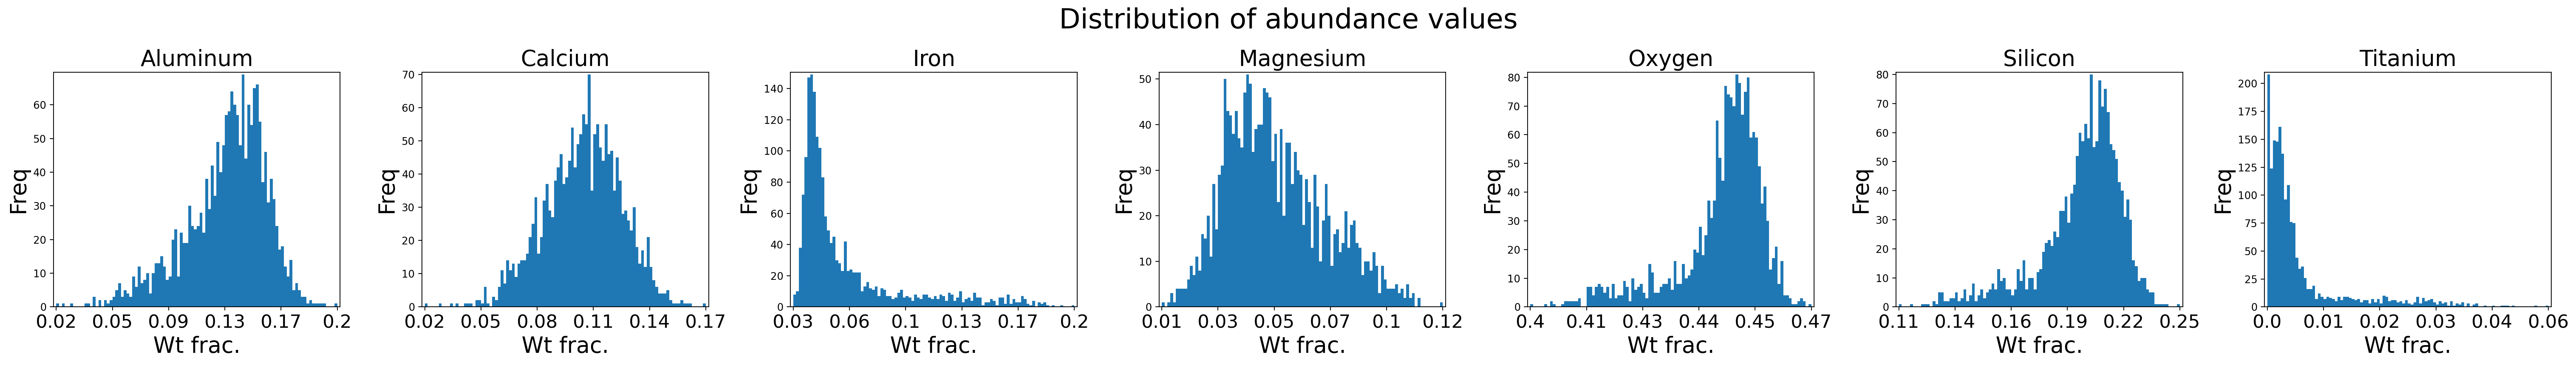

In [16]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(elementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(allElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(elementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(allElementalAbundances[:,i]),
                                 np.amax(allElementalAbundances[:,i])+np.ptp(allElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(allElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(allElementalAbundances[:,i]),
                                                 np.amax(allElementalAbundances[:,i])+np.ptp(allElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(allElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

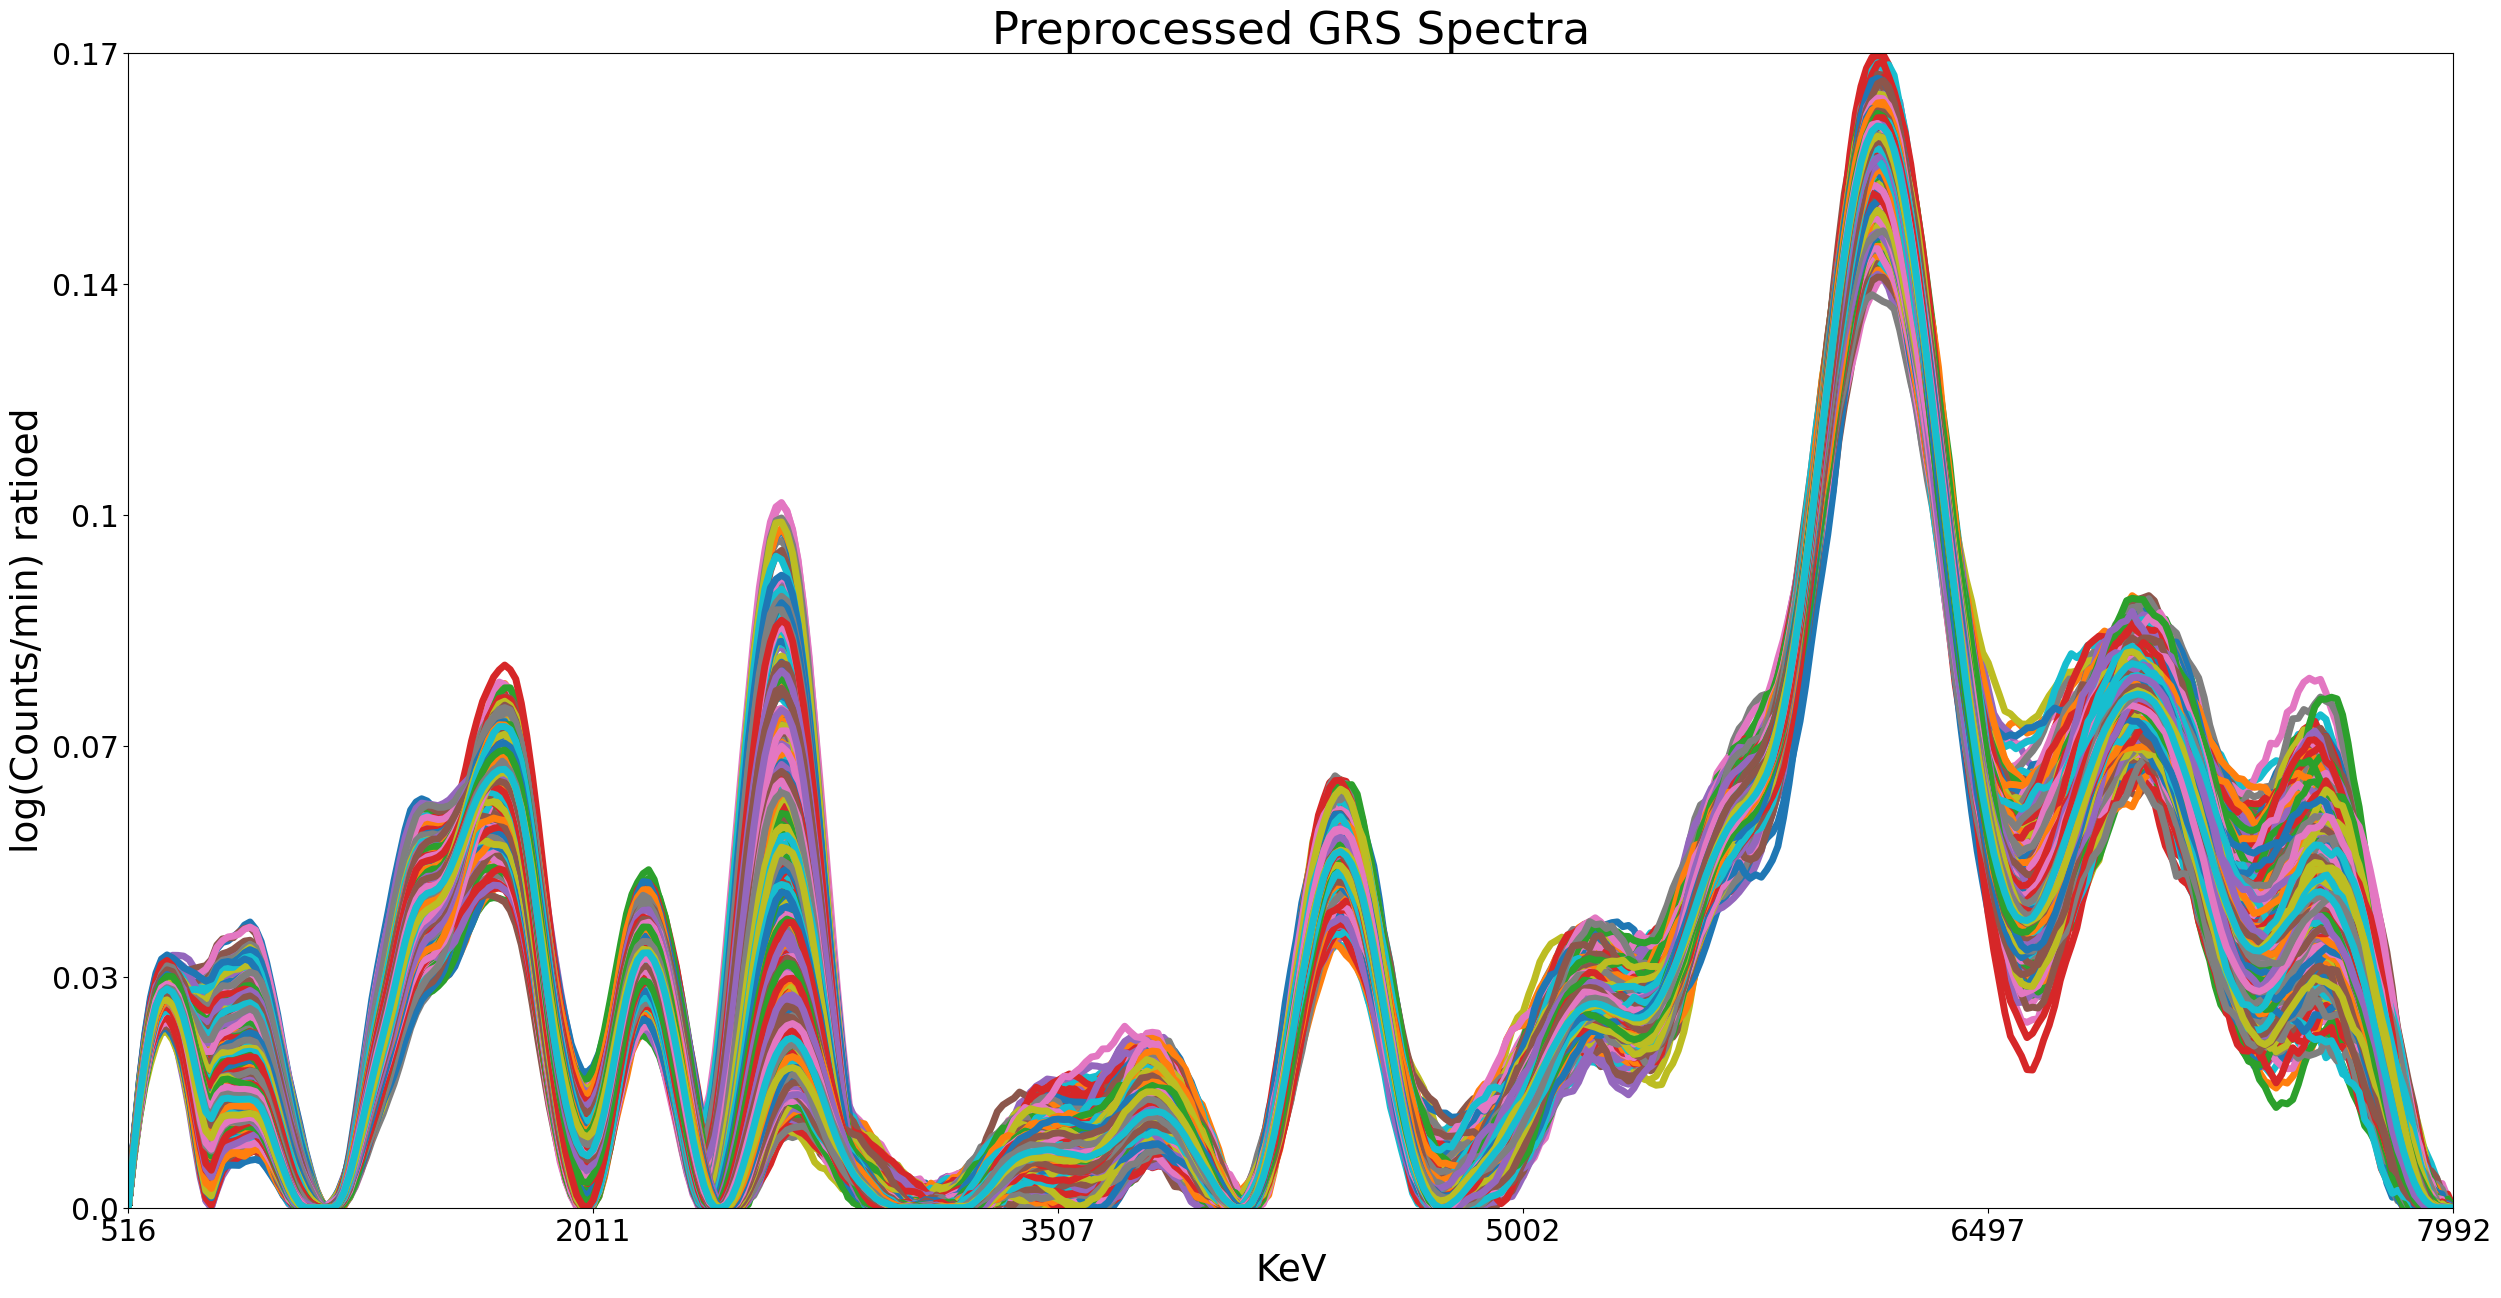

In [17]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [18]:
#import tensorflow
import tensorflow as tf

In [19]:
#set a global seed value
globalSeed=23

In [20]:
#load the pre-trained models
#define a funtion to calculate the Pearsons correlation between two sets of values
def pearson_correlation(x,y):
    x_mean=tf.reduce_mean(x)
    y_mean=tf.reduce_mean(y)
    x_diff=x-x_mean
    y_diff=y-y_mean
    covariance=tf.reduce_mean(tf.multiply(x_diff,y_diff))
    x_std=tf.sqrt(tf.reduce_mean(tf.square(x_diff)))
    y_std=tf.sqrt(tf.reduce_mean(tf.square(y_diff)))
    correlation=covariance/(x_std*y_std)
    return correlation

In [21]:
# define a funtion which creates the CAM (Channel Attention Module)
def createCAM(inputFeatureBlock,reductionRatio):
    #perform max pooling along the channel dimension
    channelMaxPooledFeatures=tf.math.reduce_max(inputFeatureBlock,
                                                axis=1,
                                                keepdims=False)
    
    #perform avg pooling along the channel dimension
    channelAvgPooledFeatures=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=1,
                                                 keepdims=False)
    
    #create the bottleneck for the MLP
    bottleneckLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1]//reductionRatio,
                                          activation='relu')
    
    #create the recontruction layer for the MLP
    outputLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1],
                                      activation='relu')
    
    #create a dropout layer for both MLP layers
    bottleNeckDropout=tf.keras.layers.Dropout(0.5,
                                              noise_shape=None,
                                              seed=globalSeed)
    
    OutputDropout=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed)
    
    #pass the max pooled features through the bottle-neck
    reconstructeedMaxPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #pass the avg pooled features through the bottle-neck
    reconstructeedAvgPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #add the two reconstructed features together
    summedFeatures=tf.math.add(reconstructeedMaxPooledFeatures,
                               reconstructeedAvgPooledFeatures)
    
    #apply sigmoid activation to the summed features to get the channel attention map
    channelAttentionMap=tf.keras.activations.sigmoid(summedFeatures)
    
    #return the channel attention map
    return channelAttentionMap

In [22]:
#define a function to create the Spatial attention module (SAM)
def createSAM(inputFeatureBlock,kernelSize):
    #perform max pooling on the input features
    maxPooledFeatureMap=tf.math.reduce_max(inputFeatureBlock,
                                           axis=-1,
                                           keepdims=False)
    #perform average pooling on the input features
    averagePooledFeatureMap=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=-1,
                                                 keepdims=False)
    
    #concatenate the feature maps together
    concatenatedFeatureMaps=tf.concat([tf.expand_dims(maxPooledFeatureMap,
                                                      axis=-1),
                                       tf.expand_dims(averagePooledFeatureMap,
                                                      axis=-1)],
                                      axis=-1)
    
    #create the convolutional layer to be applied to the concatenated feature map
    convolutionLayer=tf.keras.layers.Conv1D(filters=1,
                                            kernel_size=kernelSize,
                                            strides=1,
                                            padding='same',
                                            activation='sigmoid')
    #create and add a dropout layer
    spatialDropoutLayer=tf.keras.layers.Dropout(0.5,
                                                noise_shape=None,
                                                seed=globalSeed)
    
    
    #get the spatial attention map
    spatialAttentionMap=convolutionLayer(concatenatedFeatureMaps)
    
    
    #return the channel attention map
    return spatialAttentionMap

In [23]:
#define a function which creates a CBAM block
def createCBAM(inputLayer,convolutionalKernelSize,noOfConvolutionalFilters,reductionRatio,spatialKernelSize):
    #create a convolutional layer
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfConvolutionalFilters,
                                              kernel_size=convolutionalKernelSize,
                                              strides=1,
                                              padding='same')
    #get the feature block from the convolutional layer
    convolutionalFeatures=convolutionalLayer(inputLayer)
    
    #get the channel attention map
    channelAttentionMap=createCAM(convolutionalFeatures,
                                  reductionRatio)
    
    #replicate the channel attention to make it multiplicative with the features
    replicatedChannelAttentionMaps=tf.expand_dims(channelAttentionMap,
                                                  axis=1)
    replicatedChannelAttentionMaps=tf.repeat(replicatedChannelAttentionMaps,
                                             convolutionalFeatures.shape[1],
                                             axis=1)
    
    #compute the channel refined feature by performing element-wise multiplication between the features and the channel attention maps
    channelRefinedFeatures=tf.math.multiply(replicatedChannelAttentionMaps,
                                            convolutionalFeatures)
    
    '''
    #apply batch norm to the refined features
    channelRefinedFeatures=tf.keras.layers.BatchNormalization()(channelRefinedFeatures)
    '''
    
    #get the spatial attention map
    spatialAttentionMap=createSAM(channelRefinedFeatures,
                                  spatialKernelSize)
    
    #replicate the attention map to make it multiplicative with the channel-refined features
    replicatedSpatialAttentionMaps=tf.repeat(spatialAttentionMap,
                                             channelRefinedFeatures.shape[-1],
                                             axis=-1)
    
    #multiply the attention map with the channel refined features
    spatiallyRefinedFeatures=tf.math.multiply(replicatedSpatialAttentionMaps,
                                              channelRefinedFeatures)
    
    '''
    #apply batch norm to the refined features
    spatiallyRefinedFeatures=tf.keras.layers.BatchNormalization()(spatiallyRefinedFeatures)
    '''
    
    
    #add the refined features to the original features
    refinedFeatures=tf.math.add(convolutionalFeatures,
                                spatiallyRefinedFeatures)
    
    #return the refined features (i.e. the output of the CBAM)
    return refinedFeatures

In [24]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [25]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [26]:
#create a NN (Neural Network) graph containing just the input layer
nnGraph=inputLayer

In [27]:
#create a convolutional block
firstConvolutionalLayer=tf.keras.layers.Conv1D(filters=64,
                                               kernel_size=7,
                                               strides=1,
                                               padding='same',
                                               name="1st_Conv_layer")
#add the 1st Conv layer to the graph
nnGraph=firstConvolutionalLayer(nnGraph)

#apply Relu activation
firstReluActivation=tf.keras.layers.Activation('relu',
                                               name="1st_Activation")
#add the 1st activation layer to the graph
nnGraph=firstReluActivation(nnGraph)

#apply batch normalization
firstBatchNormalization=tf.keras.layers.BatchNormalization(name="1st_Batch_Norm")
#add the 1st batch-norm layer to the graph
nnGraph=firstBatchNormalization(nnGraph)

#apply dropout
firstDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="1st_Dropout")
#add the 1st dropout layer to the graph
nnGraph=firstDropoutLayer(nnGraph)

In [28]:
#create a list containing the number of features to be outputted by each CBAM block
noOfChannelsInEachCBAMBlock=[64,64,64,64,
                             128,128,128,128,
                             256,256,256,256,
                             512,512,512,512]

In [29]:
#iterate through all the number of channels and add CBAM blocks
for i in range(len(noOfChannelsInEachCBAMBlock)):
    #get the current number of channels 
    currentNumberOfChannels=noOfChannelsInEachCBAMBlock[i]
    #add a CBAM block to the network
    nnGraph=createCBAM(nnGraph,
                       convolutionalKernelSize=3,
                       noOfConvolutionalFilters=currentNumberOfChannels,
                       reductionRatio=6,spatialKernelSize=7)

    #create a flag indicating if the features are to be pooled
    performPooling=False
    try:
        #check if the number of of channels changes in the next block, if so set the pooling flag to true
        if noOfChannelsInEachCBAMBlock[i]!=noOfChannelsInEachCBAMBlock[i+1]:
            performPooling=True
    except:
        performPooling=False
    #check if the flag is true, if it is perform average pooling
    if performPooling:
        nnGraph=tf.keras.layers.AveragePooling1D(pool_size=2)(nnGraph)
    
    #print the shape of the current tensor
    print(f"Shape of the tensor outputted by the {i}th CBAM block #{nnGraph.shape}")

Shape of the tensor outputted by the 0th CBAM block #(None, 421, 64)
Shape of the tensor outputted by the 1th CBAM block #(None, 421, 64)
Shape of the tensor outputted by the 2th CBAM block #(None, 421, 64)
Shape of the tensor outputted by the 3th CBAM block #(None, 210, 64)
Shape of the tensor outputted by the 4th CBAM block #(None, 210, 128)
Shape of the tensor outputted by the 5th CBAM block #(None, 210, 128)
Shape of the tensor outputted by the 6th CBAM block #(None, 210, 128)
Shape of the tensor outputted by the 7th CBAM block #(None, 105, 128)
Shape of the tensor outputted by the 8th CBAM block #(None, 105, 256)
Shape of the tensor outputted by the 9th CBAM block #(None, 105, 256)
Shape of the tensor outputted by the 10th CBAM block #(None, 105, 256)
Shape of the tensor outputted by the 11th CBAM block #(None, 52, 256)
Shape of the tensor outputted by the 12th CBAM block #(None, 52, 512)
Shape of the tensor outputted by the 13th CBAM block #(None, 52, 512)
Shape of the tensor out

In [30]:
#perform global average pooling
nnGraph=tf.keras.layers.GlobalAveragePooling1D()(nnGraph)

In [31]:
#print the shape of the average pooled features
print(f"No. of nodes outputted by the Global pooling layer {nnGraph.shape}")

No. of nodes outputted by the Global pooling layer (None, 512)


In [32]:
#add a fully connected layer to the network (output layer)
outputLayer=tf.keras.layers.Dense(7,
                                  activation='relu',
                                  name="7_Element_Abundance_Embedding")
nnGraph=outputLayer(nnGraph)

In [33]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return inputNodes/(sampleWiseSums+1e-10)

In [34]:
#add a normalization layer to the network
abundanceValues=estimateAbundances(nnGraph)
nnGraph=abundanceValues

In [35]:
#print the shape of the output layer
print(f"No. of nodes in the output layer {nnGraph.shape}")

No. of nodes in the output layer (None, 7)


In [36]:
#build the model
jointAbundanceEstimator=tf.keras.Model(inputs=inputLayer,
                                       outputs=[nnGraph],
                                       name="Multitask_Abundance_estimator")

In [37]:
#create the loss function for the embedding, Mean Squared Error
lossFunction=tf.keras.losses.MeanSquaredError()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
#set the number of epochs the model is to be trained for
noOfEpochs=148
#set the batch size
batchSize=32

In [38]:
#compile the model
jointAbundanceEstimator.compile(optimizer=optimizer,
                                loss=lossFunction,
                                metrics=[pearson_correlation],
                                steps_per_execution=45)

In [39]:
#set the address where the untrained model will be saved
untrainedModelAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Joint_Abundance_Attention_Model.h5"

In [40]:
#save the untrained model
tf.keras.models.save_model(jointAbundanceEstimator,
                           untrainedModelAddress,
                           overwrite=True)

In [41]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [42]:
#set no. of folds over which the model is to be validated
noOfFolds=5

In [43]:
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [44]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [45]:
#create a list to hold model training history
modelTrainingHistories=[]
#create a list to store the trained models
trainedModels=[]

In [46]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(allElementalAbundances[:,0])):
    #print the current fold number
    print(f"Starting processing fold {i+1}")
    
    #build the model
    jointAbundanceEstimator=tf.keras.Model(inputs=inputLayer,
                                       outputs=[abundanceValues],
                                       name="Multitask_Abundance_estimator")
    
    #compile the model
    jointAbundanceEstimator.compile(optimizer=optimizer,
                                loss=lossFunction,
                                metrics=[pearson_correlation],
                                steps_per_execution=45)
    
    #fit the model to the current fold's data
    currentModelTrainingHistory=jointAbundanceEstimator.fit(x=preprocessedSpectra[trainingIndices,:],
                                                            y=allElementalAbundances[trainingIndices,:],
                                                            batch_size=batchSize,
                                                            epochs=noOfEpochs,
                                                            validation_data=(preprocessedSpectra[testingIndices,:],
                                                                             allElementalAbundances[testingIndices,:]),
                                                            validation_freq=1)
                                                            
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    
    #set the address where the trained model from the current 
    currentFoldTrainedModelAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Joint_Abundance_Attention_Model"+str(i+1)+".h5"
    
    #save the trained model
    trainedModels.append(jointAbundanceEstimator)
    
    break

Starting processing fold 1
Epoch 1/148
45/45 [==============================] - 34s 753ms/step - loss: 0.0067 - pearson_correlation: 0.8658 - val_loss: 0.0030 - val_pearson_correlation: 0.9232
Epoch 2/148
45/45 [==============================] - 6s 139ms/step - loss: 0.0024 - pearson_correlation: 0.9434 - val_loss: 0.0028 - val_pearson_correlation: 0.9286
Epoch 3/148
45/45 [==============================] - 6s 136ms/step - loss: 0.0024 - pearson_correlation: 0.9436 - val_loss: 0.0029 - val_pearson_correlation: 0.9256
Epoch 4/148
45/45 [==============================] - 6s 138ms/step - loss: 0.0023 - pearson_correlation: 0.9452 - val_loss: 0.0028 - val_pearson_correlation: 0.9280
Epoch 5/148
45/45 [==============================] - 6s 127ms/step - loss: 0.0023 - pearson_correlation: 0.9466 - val_loss: 0.0028 - val_pearson_correlation: 0.9260
Epoch 6/148
45/45 [==============================] - 6s 130ms/step - loss: 0.0022 - pearson_correlation: 0.9476 - val_loss: 0.0028 - val_pearson_co

45/45 [==============================] - 6s 126ms/step - loss: 1.5545e-04 - pearson_correlation: 0.9959 - val_loss: 1.4218e-04 - val_pearson_correlation: 0.9964
Epoch 49/148
45/45 [==============================] - 6s 127ms/step - loss: 1.4398e-04 - pearson_correlation: 0.9962 - val_loss: 1.5249e-04 - val_pearson_correlation: 0.9961
Epoch 50/148
45/45 [==============================] - 6s 125ms/step - loss: 1.4590e-04 - pearson_correlation: 0.9962 - val_loss: 1.3844e-04 - val_pearson_correlation: 0.9965
Epoch 51/148
45/45 [==============================] - 6s 124ms/step - loss: 1.4144e-04 - pearson_correlation: 0.9963 - val_loss: 1.4427e-04 - val_pearson_correlation: 0.9964
Epoch 52/148
45/45 [==============================] - 6s 126ms/step - loss: 1.4374e-04 - pearson_correlation: 0.9963 - val_loss: 1.4067e-04 - val_pearson_correlation: 0.9964
Epoch 53/148
45/45 [==============================] - 6s 125ms/step - loss: 1.4140e-04 - pearson_correlation: 0.9963 - val_loss: 1.3782e-04 - v

45/45 [==============================] - 6s 128ms/step - loss: 1.3057e-04 - pearson_correlation: 0.9966 - val_loss: 1.3614e-04 - val_pearson_correlation: 0.9965
Epoch 96/148
45/45 [==============================] - 6s 127ms/step - loss: 1.3563e-04 - pearson_correlation: 0.9965 - val_loss: 1.3032e-04 - val_pearson_correlation: 0.9967
Epoch 97/148
45/45 [==============================] - 6s 127ms/step - loss: 1.3373e-04 - pearson_correlation: 0.9965 - val_loss: 1.4837e-04 - val_pearson_correlation: 0.9963
Epoch 98/148
45/45 [==============================] - 6s 128ms/step - loss: 1.3780e-04 - pearson_correlation: 0.9964 - val_loss: 1.3100e-04 - val_pearson_correlation: 0.9967
Epoch 99/148
45/45 [==============================] - 6s 126ms/step - loss: 1.3198e-04 - pearson_correlation: 0.9965 - val_loss: 1.3614e-04 - val_pearson_correlation: 0.9965
Epoch 100/148
45/45 [==============================] - 6s 128ms/step - loss: 1.3546e-04 - pearson_correlation: 0.9965 - val_loss: 1.3108e-04 - 

Epoch 142/148
45/45 [==============================] - 6s 130ms/step - loss: 1.4345e-04 - pearson_correlation: 0.9963 - val_loss: 1.3955e-04 - val_pearson_correlation: 0.9965
Epoch 143/148
45/45 [==============================] - 6s 127ms/step - loss: 1.3285e-04 - pearson_correlation: 0.9965 - val_loss: 1.3689e-04 - val_pearson_correlation: 0.9965
Epoch 144/148
45/45 [==============================] - 6s 128ms/step - loss: 1.2990e-04 - pearson_correlation: 0.9966 - val_loss: 1.3088e-04 - val_pearson_correlation: 0.9966
Epoch 145/148
45/45 [==============================] - 6s 128ms/step - loss: 1.2631e-04 - pearson_correlation: 0.9967 - val_loss: 1.2547e-04 - val_pearson_correlation: 0.9967
Epoch 146/148
45/45 [==============================] - 6s 128ms/step - loss: 1.2934e-04 - pearson_correlation: 0.9966 - val_loss: 1.2584e-04 - val_pearson_correlation: 0.9968
Epoch 147/148
45/45 [==============================] - 6s 129ms/step - loss: 1.2278e-04 - pearson_correlation: 0.9968 - val_l

NameError: name 'kAbundanceEstimator' is not defined

In [48]:
#predict the abundances
predictedAbundances=jointAbundanceEstimator.predict(preprocessedSpectra[testingIndices,:])

12/12 [==============================] - 575s 48s/step


In [49]:
#get the actual abundances for the test samples
actualTestAbundances=allElementalAbundances[testingIndices,:]

In [54]:
#iterate through all the elements
for i in range(actualTestAbundances.shape[1]):
    #get the actual and predicted abundances for the current element
    currentElementPredictedAbundances=predictedAbundances[:,i]
    currentElementActualAbundances=actualTestAbundances[:,i]
    #compute the correlation between the actual and predicted abundances
    currentElementCorrelation=np.corrcoef(currentElementPredictedAbundances,
                                          currentElementActualAbundances)[0,1]
    #get the name of the current element
    currentElementName=elementNames[i]
    #print the element's name and the correlation between its actual and predicted abundances
    print(f"{currentElementName}--{round(currentElementCorrelation,2)}")

Aluminum--0.82
Calcium--0.73
Iron--0.96
Magnesium--0.85
Oxygen--0.86
Silicon--0.84
Titanium--0.93


(358, 7)